In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score,roc_curve

In [150]:
df=pd.read_csv(r"C:\Users\SID13\Downloads\Logistic_Regression_Binary_Classsification_Churn_Data.csv")

In [151]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [153]:
df.tail()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,66,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [154]:
def convert(x):
    if x=="Yes":
        return 1
    elif x=="No":
        return 0

In [155]:
df["PhoneService"]=df["PhoneService"].apply(convert)

df["PaperlessBilling"]=df["PaperlessBilling"].apply(convert)

df["Churn"]=df["Churn"].apply(convert)

In [156]:
df

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [157]:
df.notnull()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True


In [158]:
x=df[["MonthlyCharges"]]
y=df[["Churn"]]

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [160]:
reg=LogisticRegression()


In [161]:
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [162]:
y_pred=reg.predict(x_test)

In [163]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [164]:
confusion_matrix(y_test,y_pred)

array([[1041,    0],
       [ 368,    0]], dtype=int64)

In [165]:

accuracy_score(y_test,y_pred)

0.7388218594748048

In [166]:
# multipleindependentvariable

In [167]:
x=df[["MonthlyCharges","tenure"]]
y=df[["Churn"]]

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [169]:
regr=LogisticRegression()

In [170]:
regr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
y_pred=regr.predict(x_test)

In [172]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
y_test[:5]

,Churn
2200,0
4627,0
3225,0
2828,0
3768,0


In [174]:

confusion_matrix(y_test,y_pred)

array([[1407,  153],
       [ 314,  239]], dtype=int64)

In [175]:
accuracy_score(y_test,y_pred)

0.7789872219592996

In [176]:
recall_score(y_test,y_pred)

0.4321880650994575

In [177]:
f1_score(y_test,y_pred)

0.5058201058201058

In [179]:
y_pred_prob = regr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

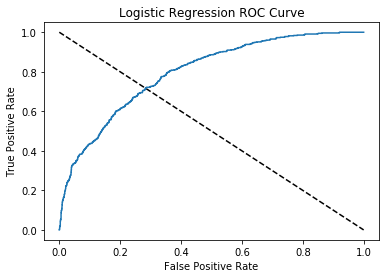

In [180]:
plt.plot([0, 1], [1, 0], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()